In [1]:
%pip install datasets
from datasets import load_dataset

In [2]:
dataset = load_dataset("google/wit")

c:\Users\dasha\miniconda3\envs\classical-ml\Lib\site-packages\datasets\load.py:1429: FutureWarning: The repository for google/wit contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/google/wit
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [3]:
dataset["train"]

Dataset({
    features: ['language', 'page_url', 'image_url', 'page_title', 'section_title', 'hierarchical_section_title', 'caption_reference_description', 'caption_attribution_description', 'caption_alt_text_description', 'mime_type', 'original_height', 'original_width', 'is_main_image', 'attribution_passes_lang_id', 'page_changed_recently', 'context_page_description', 'context_section_description'],
    num_rows: 37046386
})

Датасет на английском

In [4]:
dataset = dataset.filter(lambda example: example["language"] == 'en' or 'en' in example["language"])

Filter:   0%|          | 0/37046386 [00:00<?, ? examples/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['language', 'page_url', 'image_url', 'page_title', 'section_title', 'hierarchical_section_title', 'caption_reference_description', 'caption_attribution_description', 'caption_alt_text_description', 'mime_type', 'original_height', 'original_width', 'is_main_image', 'attribution_passes_lang_id', 'page_changed_recently', 'context_page_description', 'context_section_description'],
        num_rows: 5411978
    })
})

In [6]:
dataset.set_format(type='pandas')
dataset["train"][:].to_csv("wiki.csv", index=None)

In [1]:
import pandas as pd  
sample_cols_to_keep =['language', 'image_url', 'page_title','caption_reference_description', 'caption_attribution_description', 'mime_type', 'original_height', 'original_width', 'is_main_image']
df_wiki = pd.read_csv('wiki.csv', usecols=sample_cols_to_keep, chunksize=10000)
df = pd.concat(df_wiki,ignore_index=True)

In [2]:
df.is_main_image.value_counts()

is_main_image
True    5411978
Name: count, dtype: int64

In [3]:
df = df.drop(columns='is_main_image')

In [4]:
df

,language,image_url,page_title,caption_reference_description,caption_attribution_description,mime_type,original_height,original_width
0,en,https://upload.wikimedia.org/wikipedia/commons...,Oxydactylus,NaN,English: Mounted skeleton of Oxydactylus longi...,image/jpeg,3564,2748
1,en,https://upload.wikimedia.org/wikipedia/commons...,Maine's 3rd congressional district,NaN,"English: Samuel W. Gould, US Representative fr...",image/jpeg,1870,1421
2,en,https://upload.wikimedia.org/wikipedia/commons...,Cheraw,A c. 1724 English copy of a deerskin Catawba m...,"English: ""Map of the Several Nations of Indian...",image/jpeg,1217,1770
3,en,https://upload.wikimedia.org/wikipedia/commons...,Romanian Front,"Nameplate of Gazeta Transilvaniei on June 14, ...",English: Nameplate of the Romanian nationalist...,image/png,306,960
4,en,https://upload.wikimedia.org/wikipedia/commons...,Ádám Kósa,NaN,English: Hungarian MEP Ádám Kósa,image/jpeg,4928,3264
...,...,...,...,...,...,...,...,...
5411973,en,https://upload.wikimedia.org/wikipedia/commons...,List of vice presidents of the Examination Yuan,NaN,"English: Jia Jingde, politician of China. 中文: ...",image/jpeg,1311,983
5411974,en,https://upload.wikimedia.org/wikipedia/commons...,Brennen Beyer,Beyer in 2013,DSC_9909.jpg,image/jpeg,1561,1216
5411975,en,https://upload.wikimedia.org/wikipedia/commons...,Kannagi,Kannagi in Tamil Nadu.,"English: Idol of Kannaki Amman at Sanctum, Tha...",image/jpeg,720,540
5411976,en,https://upload.wikimedia.org/wikipedia/commons...,Don Det,NaN,English: Landscape with stormy clouds and a pi...,image/jpeg,3720,6613


In [5]:
df = df.dropna(subset=['caption_reference_description', 'page_title', 'caption_attribution_description'], how='all')

In [6]:
import numpy as np
df['caption_attribution_description'] = df['caption_attribution_description'].apply(lambda x : np.nan if pd.isna(x) else np.nan if str(x)[:8] != 'English:' else str(x)[9:])
df

,language,image_url,page_title,caption_reference_description,caption_attribution_description,mime_type,original_height,original_width
0,en,https://upload.wikimedia.org/wikipedia/commons...,Oxydactylus,NaN,Mounted skeleton of Oxydactylus longipes in th...,image/jpeg,3564,2748
1,en,https://upload.wikimedia.org/wikipedia/commons...,Maine's 3rd congressional district,NaN,"Samuel W. Gould, US Representative from Maine",image/jpeg,1870,1421
2,en,https://upload.wikimedia.org/wikipedia/commons...,Cheraw,A c. 1724 English copy of a deerskin Catawba m...,"""Map of the Several Nations of Indians to the ...",image/jpeg,1217,1770
3,en,https://upload.wikimedia.org/wikipedia/commons...,Romanian Front,"Nameplate of Gazeta Transilvaniei on June 14, ...",Nameplate of the Romanian nationalist newspape...,image/png,306,960
4,en,https://upload.wikimedia.org/wikipedia/commons...,Ádám Kósa,NaN,Hungarian MEP Ádám Kósa,image/jpeg,4928,3264
...,...,...,...,...,...,...,...,...
5411973,en,https://upload.wikimedia.org/wikipedia/commons...,List of vice presidents of the Examination Yuan,NaN,"Jia Jingde, politician of China. 中文: 贾景德（1880年...",image/jpeg,1311,983
5411974,en,https://upload.wikimedia.org/wikipedia/commons...,Brennen Beyer,Beyer in 2013,NaN,image/jpeg,1561,1216
5411975,en,https://upload.wikimedia.org/wikipedia/commons...,Kannagi,Kannagi in Tamil Nadu.,"Idol of Kannaki Amman at Sanctum, Thambiluvil ...",image/jpeg,720,540
5411976,en,https://upload.wikimedia.org/wikipedia/commons...,Don Det,NaN,Landscape with stormy clouds and a pirogue on ...,image/jpeg,3720,6613


In [7]:
import re
R = r'\b(?![A-Za-z0-9]+[!"#$%&\'()*+,\\ -./:;<=>?@[\]^{|}])\w+\b'
df['caption_attribution_description'] = df['caption_attribution_description'].apply(lambda x : np.nan if pd.isna(x) else re.sub(R, '', (str(x) + ' ')))

In [8]:
mask = ((df.caption_attribution_description == '') | (df.caption_attribution_description.str.contains('^[0-9!"#$%&\'()*+,\\ -./:;<=>?@[\]^{|}\s]+$')))
df.loc[mask, 'caption_attribution_description'] = np.nan

In [9]:
import re
R = r'\b(?![A-Za-z0-9]+[!"#$%&\'()*+,\\ -./:;<=>?@[\]^{|}])\w+\b'
df['caption_reference_description'] = df['caption_reference_description'].apply(lambda x : np.nan if pd.isna(x) else re.sub(R, '', (str(x) + ' ')))

In [10]:
mask = ((df.caption_reference_description == '') | (df.caption_reference_description.str.contains('^[0-9!"#$%&\'()*+,\\ -./:;<=>?@[\]^{|}\s]+$')))
df.loc[mask, 'caption_reference_description'] = np.nan

In [11]:
df.loc[:, 'caption_reference_description'] = df.loc[:, 'caption_reference_description'].fillna(df.caption_attribution_description)
df

,language,image_url,page_title,caption_reference_description,caption_attribution_description,mime_type,original_height,original_width
0,en,https://upload.wikimedia.org/wikipedia/commons...,Oxydactylus,Mounted skeleton of Oxydactylus longipes in th...,Mounted skeleton of Oxydactylus longipes in th...,image/jpeg,3564,2748
1,en,https://upload.wikimedia.org/wikipedia/commons...,Maine's 3rd congressional district,"Samuel W. Gould, US Representative from Maine","Samuel W. Gould, US Representative from Maine",image/jpeg,1870,1421
2,en,https://upload.wikimedia.org/wikipedia/commons...,Cheraw,A c. 1724 English copy of a deerskin Catawba m...,"""Map of the Several Nations of Indians to the ...",image/jpeg,1217,1770
3,en,https://upload.wikimedia.org/wikipedia/commons...,Romanian Front,"Nameplate of Gazeta Transilvaniei on June 14, ...",Nameplate of the Romanian nationalist newspape...,image/png,306,960
4,en,https://upload.wikimedia.org/wikipedia/commons...,Ádám Kósa,Hungarian MEP,Hungarian MEP,image/jpeg,4928,3264
...,...,...,...,...,...,...,...,...
5411973,en,https://upload.wikimedia.org/wikipedia/commons...,List of vice presidents of the Examination Yuan,"Jia Jingde, politician of China. : （－），，，。，。","Jia Jingde, politician of China. : （－），，，。，。",image/jpeg,1311,983
5411974,en,https://upload.wikimedia.org/wikipedia/commons...,Brennen Beyer,Beyer in 2013,NaN,image/jpeg,1561,1216
5411975,en,https://upload.wikimedia.org/wikipedia/commons...,Kannagi,Kannagi in Tamil Nadu.,"Idol of Kannaki Amman at Sanctum, Thambiluvil ...",image/jpeg,720,540
5411976,en,https://upload.wikimedia.org/wikipedia/commons...,Don Det,Landscape with stormy clouds and a pirogue on ...,Landscape with stormy clouds and a pirogue on ...,image/jpeg,3720,6613


In [12]:
df['caption_reference_description'] = df['caption_reference_description'].fillna(df.page_title)

In [13]:
df = df.dropna(subset=['caption_reference_description'])

In [14]:
df['caption_reference_description'] =  df['caption_reference_description'].apply(lambda x: re.sub(R, '', (str(x) + ' ')))
mask = ((df.caption_reference_description == '') | (df.caption_reference_description.str.contains('^[0-9!"#$%&\'()*+,\\ -./:;<=>?@[\]^{|}\s]+$')))

In [15]:
mask.value_counts()

caption_reference_description
False    5390614
True       21364
Name: count, dtype: int64

In [16]:
df[mask]

,language,image_url,page_title,caption_reference_description,caption_attribution_description,mime_type,original_height,original_width
240,en,https://upload.wikimedia.org/wikipedia/commons...,Hlušovice,,NaN,image/jpeg,600,489
624,en,https://upload.wikimedia.org/wikipedia/commons...,Nikç,,NaN,image/jpeg,3214,3218
887,en,https://upload.wikimedia.org/wikipedia/commons...,Groß Twülpstedt,,NaN,image/jpeg,1944,2592
1354,en,https://upload.wikimedia.org/wikipedia/commons...,Millesgården,,NaN,image/jpeg,1150,1732
1382,en,http://upload.wikimedia.org/wikipedia/commons/...,Völpke,,NaN,image/png,660,590
...,...,...,...,...,...,...,...,...
5409626,en,https://upload.wikimedia.org/wikipedia/commons...,Gösenroth,,NaN,image/jpeg,540,475
5409976,en,http://upload.wikimedia.org/wikipedia/commons/...,Pšov,,NaN,image/png,1387,855
5410856,en,https://upload.wikimedia.org/wikipedia/commons...,Hàn Mặc Tử,,NaN,image/jpeg,379,229
5411103,en,https://upload.wikimedia.org/wikipedia/commons...,Blaž Kavčič,,NaN,image/jpeg,1600,1646


In [17]:
df = df.loc[~mask]
df

,language,image_url,page_title,caption_reference_description,caption_attribution_description,mime_type,original_height,original_width
0,en,https://upload.wikimedia.org/wikipedia/commons...,Oxydactylus,Mounted skeleton of Oxydactylus longipes in th...,Mounted skeleton of Oxydactylus longipes in th...,image/jpeg,3564,2748
1,en,https://upload.wikimedia.org/wikipedia/commons...,Maine's 3rd congressional district,"Samuel W. Gould, US Representative from Maine","Samuel W. Gould, US Representative from Maine",image/jpeg,1870,1421
2,en,https://upload.wikimedia.org/wikipedia/commons...,Cheraw,A c. 1724 English copy of a deerskin Catawba m...,"""Map of the Several Nations of Indians to the ...",image/jpeg,1217,1770
3,en,https://upload.wikimedia.org/wikipedia/commons...,Romanian Front,"Nameplate of Gazeta Transilvaniei on June 14, ...",Nameplate of the Romanian nationalist newspape...,image/png,306,960
4,en,https://upload.wikimedia.org/wikipedia/commons...,Ádám Kósa,Hungarian MEP,Hungarian MEP,image/jpeg,4928,3264
...,...,...,...,...,...,...,...,...
5411973,en,https://upload.wikimedia.org/wikipedia/commons...,List of vice presidents of the Examination Yuan,"Jia Jingde, politician of China. : （－），，，。，。","Jia Jingde, politician of China. : （－），，，。，。",image/jpeg,1311,983
5411974,en,https://upload.wikimedia.org/wikipedia/commons...,Brennen Beyer,Beyer in 2013,NaN,image/jpeg,1561,1216
5411975,en,https://upload.wikimedia.org/wikipedia/commons...,Kannagi,Kannagi in Tamil Nadu.,"Idol of Kannaki Amman at Sanctum, Thambiluvil ...",image/jpeg,720,540
5411976,en,https://upload.wikimedia.org/wikipedia/commons...,Don Det,Landscape with stormy clouds and a pirogue on ...,Landscape with stormy clouds and a pirogue on ...,image/jpeg,3720,6613


Все названия на английском 

In [18]:
df = df.dropna(subset=['caption_reference_description', 'image_url'])
df

,language,image_url,page_title,caption_reference_description,caption_attribution_description,mime_type,original_height,original_width
0,en,https://upload.wikimedia.org/wikipedia/commons...,Oxydactylus,Mounted skeleton of Oxydactylus longipes in th...,Mounted skeleton of Oxydactylus longipes in th...,image/jpeg,3564,2748
1,en,https://upload.wikimedia.org/wikipedia/commons...,Maine's 3rd congressional district,"Samuel W. Gould, US Representative from Maine","Samuel W. Gould, US Representative from Maine",image/jpeg,1870,1421
2,en,https://upload.wikimedia.org/wikipedia/commons...,Cheraw,A c. 1724 English copy of a deerskin Catawba m...,"""Map of the Several Nations of Indians to the ...",image/jpeg,1217,1770
3,en,https://upload.wikimedia.org/wikipedia/commons...,Romanian Front,"Nameplate of Gazeta Transilvaniei on June 14, ...",Nameplate of the Romanian nationalist newspape...,image/png,306,960
4,en,https://upload.wikimedia.org/wikipedia/commons...,Ádám Kósa,Hungarian MEP,Hungarian MEP,image/jpeg,4928,3264
...,...,...,...,...,...,...,...,...
5411973,en,https://upload.wikimedia.org/wikipedia/commons...,List of vice presidents of the Examination Yuan,"Jia Jingde, politician of China. : （－），，，。，。","Jia Jingde, politician of China. : （－），，，。，。",image/jpeg,1311,983
5411974,en,https://upload.wikimedia.org/wikipedia/commons...,Brennen Beyer,Beyer in 2013,NaN,image/jpeg,1561,1216
5411975,en,https://upload.wikimedia.org/wikipedia/commons...,Kannagi,Kannagi in Tamil Nadu.,"Idol of Kannaki Amman at Sanctum, Thambiluvil ...",image/jpeg,720,540
5411976,en,https://upload.wikimedia.org/wikipedia/commons...,Don Det,Landscape with stormy clouds and a pirogue on ...,Landscape with stormy clouds and a pirogue on ...,image/jpeg,3720,6613


Уберем лишние знаки препинания

In [19]:
R = re.compile(r'[A-Za-z0-9]')
df['caption_reference_description'] = df['caption_reference_description'].apply(lambda x: str(x)[: (0 if len(R.findall(str(x))) == 0 else str(x).rfind(R.findall(str(x))[-1])) + 1])

In [20]:
df

,language,image_url,page_title,caption_reference_description,caption_attribution_description,mime_type,original_height,original_width
0,en,https://upload.wikimedia.org/wikipedia/commons...,Oxydactylus,Mounted skeleton of Oxydactylus longipes in th...,Mounted skeleton of Oxydactylus longipes in th...,image/jpeg,3564,2748
1,en,https://upload.wikimedia.org/wikipedia/commons...,Maine's 3rd congressional district,"Samuel W. Gould, US Representative from Maine","Samuel W. Gould, US Representative from Maine",image/jpeg,1870,1421
2,en,https://upload.wikimedia.org/wikipedia/commons...,Cheraw,A c. 1724 English copy of a deerskin Catawba m...,"""Map of the Several Nations of Indians to the ...",image/jpeg,1217,1770
3,en,https://upload.wikimedia.org/wikipedia/commons...,Romanian Front,"Nameplate of Gazeta Transilvaniei on June 14, ...",Nameplate of the Romanian nationalist newspape...,image/png,306,960
4,en,https://upload.wikimedia.org/wikipedia/commons...,Ádám Kósa,Hungarian MEP,Hungarian MEP,image/jpeg,4928,3264
...,...,...,...,...,...,...,...,...
5411973,en,https://upload.wikimedia.org/wikipedia/commons...,List of vice presidents of the Examination Yuan,"Jia Jingde, politician of China","Jia Jingde, politician of China. : （－），，，。，。",image/jpeg,1311,983
5411974,en,https://upload.wikimedia.org/wikipedia/commons...,Brennen Beyer,Beyer in 2013,NaN,image/jpeg,1561,1216
5411975,en,https://upload.wikimedia.org/wikipedia/commons...,Kannagi,Kannagi in Tamil Nadu,"Idol of Kannaki Amman at Sanctum, Thambiluvil ...",image/jpeg,720,540
5411976,en,https://upload.wikimedia.org/wikipedia/commons...,Don Det,Landscape with stormy clouds and a pirogue on ...,Landscape with stormy clouds and a pirogue on ...,image/jpeg,3720,6613


In [21]:
df = df.dropna(subset=['caption_reference_description', 'image_url'])

In [22]:
df = df.drop_duplicates(subset='image_url')
df

,language,image_url,page_title,caption_reference_description,caption_attribution_description,mime_type,original_height,original_width
0,en,https://upload.wikimedia.org/wikipedia/commons...,Oxydactylus,Mounted skeleton of Oxydactylus longipes in th...,Mounted skeleton of Oxydactylus longipes in th...,image/jpeg,3564,2748
1,en,https://upload.wikimedia.org/wikipedia/commons...,Maine's 3rd congressional district,"Samuel W. Gould, US Representative from Maine","Samuel W. Gould, US Representative from Maine",image/jpeg,1870,1421
2,en,https://upload.wikimedia.org/wikipedia/commons...,Cheraw,A c. 1724 English copy of a deerskin Catawba m...,"""Map of the Several Nations of Indians to the ...",image/jpeg,1217,1770
3,en,https://upload.wikimedia.org/wikipedia/commons...,Romanian Front,"Nameplate of Gazeta Transilvaniei on June 14, ...",Nameplate of the Romanian nationalist newspape...,image/png,306,960
4,en,https://upload.wikimedia.org/wikipedia/commons...,Ádám Kósa,Hungarian MEP,Hungarian MEP,image/jpeg,4928,3264
...,...,...,...,...,...,...,...,...
5411966,en,https://upload.wikimedia.org/wikipedia/commons...,Bisaldeo temple,Bisaldeo temple in 2016 with submerged courtyard,this temple is submerged in water after heavy ...,image/jpeg,3072,4608
5411969,en,https://upload.wikimedia.org/wikipedia/commons...,Pyatigorsk,Pyatigorsk,NaN,image/jpeg,2448,3264
5411974,en,https://upload.wikimedia.org/wikipedia/commons...,Brennen Beyer,Beyer in 2013,NaN,image/jpeg,1561,1216
5411976,en,https://upload.wikimedia.org/wikipedia/commons...,Don Det,Landscape with stormy clouds and a pirogue on ...,Landscape with stormy clouds and a pirogue on ...,image/jpeg,3720,6613


Исключим длинные предложения

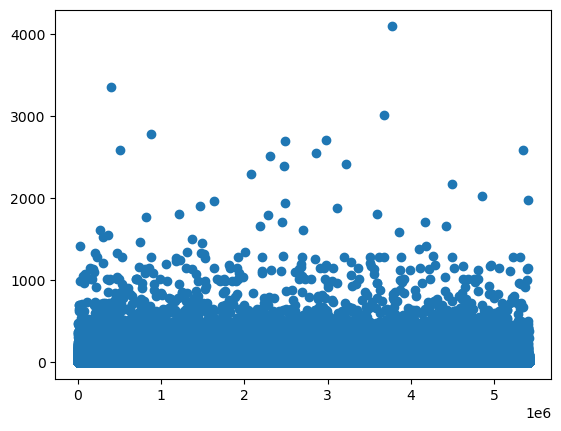

In [23]:
import matplotlib.pyplot as plt
words = df["caption_reference_description"].apply(lambda x : str(x).count(" "))
plt.scatter(words.index, words)

In [29]:
df.loc[df["caption_reference_description"].str.count(" ") > 20, :].shape

(339105, 8)

In [27]:
df.shape

(3919056, 8)

In [31]:
df = df.loc[df["caption_reference_description"].str.count(" ") <= 20, :]

In [32]:
df = df.reindex(range(df.shape[0]))

Разделим датасет по mime_type

In [33]:
df["mime_type"].value_counts()

mime_type
image/jpeg       2222000
image/png         262310
image/svg+xml      77041
image/gif          10396
image/webp           106
Name: count, dtype: int64

In [34]:
df_png = df[df.mime_type == "image/png"]
df_svg_xml = df[df.mime_type == "image/svg+xml"]
df = df[df.mime_type == "image/jpeg"]

In [35]:
df = df[["image_url", "caption_reference_description"]]
df_png = df_png[["image_url", "caption_reference_description"]]
df_svg_xml = df_svg_xml[["image_url", "caption_reference_description"]]

In [36]:
df.to_csv("wiki_en_jpeg.csv")
df_png.to_csv("wiki_en_png.csv")
df_svg_xml.to_csv("wiki_en_svg_xml.csv")

Датасет на русском

In [253]:
dataset_ru = load_dataset("google/wit")

c:\Users\dasha\miniconda3\envs\classical-ml\Lib\site-packages\datasets\load.py:1429: FutureWarning: The repository for google/wit contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/google/wit
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [254]:
dataset_ru = dataset_ru.filter(lambda example: example["language"] == 'ru' or 'ru' in example["language"])

Filter:   0%|          | 0/37046386 [00:00<?, ? examples/s]

In [255]:
dataset_ru

DatasetDict({
    train: Dataset({
        features: ['language', 'page_url', 'image_url', 'page_title', 'section_title', 'hierarchical_section_title', 'caption_reference_description', 'caption_attribution_description', 'caption_alt_text_description', 'mime_type', 'original_height', 'original_width', 'is_main_image', 'attribution_passes_lang_id', 'page_changed_recently', 'context_page_description', 'context_section_description'],
        num_rows: 1531915
    })
})

In [256]:
dataset_ru.set_format(type='pandas')
dataset_ru["train"][:].to_csv("wiki_ru.csv", index=None)

In [37]:
import pandas as pd  
sample_cols_to_keep_ru =['language', 'image_url', 'page_title','caption_reference_description', 'caption_attribution_description', 'mime_type', 'is_main_image']
df_wiki_ru = pd.read_csv('wiki_ru.csv', usecols=sample_cols_to_keep_ru, chunksize=10000)
df_ru = pd.concat(df_wiki_ru,ignore_index=True)

In [38]:
df_ru.is_main_image.value_counts()

is_main_image
True    1531915
Name: count, dtype: int64

In [39]:
df_ru = df_ru.drop(columns='is_main_image')

In [40]:
df_ru = df_ru.dropna(subset=['caption_reference_description', 'page_title', 'caption_attribution_description'], how='all')

In [41]:
import numpy as np
df_ru['caption_attribution_description'] = df_ru['caption_attribution_description'].apply(lambda x : np.nan if pd.isna(x) else np.nan if str(x)[:8] != 'Русский:' else str(x)[9:])
df_ru

,language,image_url,page_title,caption_reference_description,caption_attribution_description,mime_type
0,ru,https://upload.wikimedia.org/wikipedia/commons...,Умершие в ноябре 2013 года,Владислав Захаревич,Ректор ЮФУ В.Г. ЗахаревичEnglish: Prof. Vladis...,image/jpeg
1,ru,https://upload.wikimedia.org/wikipedia/commons...,Baseodiscus princeps,NaN,NaN,image/png
2,ru,https://upload.wikimedia.org/wikipedia/commons...,Список губернаторов Орегона,NaN,NaN,image/jpeg
3,ru,https://upload.wikimedia.org/wikipedia/commons...,Славоницки-Поток,NaN,NaN,image/jpeg
4,ru,https://upload.wikimedia.org/wikipedia/commons...,NGC 4189,NaN,NaN,image/jpeg
...,...,...,...,...,...,...
1531910,ru,https://upload.wikimedia.org/wikipedia/commons...,Военная промышленность Аргентины,NaN,NaN,image/jpeg
1531911,ru,https://upload.wikimedia.org/wikipedia/commons...,Быстряги (Кировская область),NaN,ул.Привокзальная,image/jpeg
1531912,ru,https://upload.wikimedia.org/wikipedia/commons...,Мелитопольское училище культуры,Скульптура возле входа в училище,Скульптура около мелитопольского училища культ...,image/jpeg
1531913,ru,https://upload.wikimedia.org/wikipedia/commons...,The Sisters of Mercy,NaN,NaN,image/jpeg


In [42]:
import re
R = r'\b(?![а-яА-ЯёЁ0-9]+[!"#$%&\'()*+,\\ -./:;<=>?@[\]^{|}])\w+\b'
df_ru['caption_attribution_description'] = df_ru['caption_attribution_description'].apply(lambda x : np.nan if pd.isna(x) else re.sub(R, '', (str(x) + ' ')))

In [43]:
mask = ((df_ru.caption_attribution_description == '') | (df_ru.caption_attribution_description.str.contains('^[0-9!"#$%&\'()*+,\\ -./:;<=>?@[\]^{|}\s]+$')))
df_ru.loc[mask, 'caption_attribution_description'] = np.nan

In [44]:
import re
R = r'\b(?![а-яА-ЯёЁ0-9]+[!"#$%&\'()*+,\\ -./:;<=>?@[\]^{|}])\w+\b'
df_ru['caption_reference_description'] = df_ru['caption_reference_description'].apply(lambda x : np.nan if pd.isna(x) else re.sub(R, '', (str(x) + ' ')))

In [45]:
mask = ((df_ru.caption_reference_description == '') | (df_ru.caption_reference_description.str.contains('^[0-9!"#$%&\'()*+,\\ -./:;<=>?@[\]^{|}\s]+$')))
df_ru.loc[mask, 'caption_reference_description'] = np.nan

In [46]:
df_ru.loc[:, 'caption_reference_description'] = df_ru.loc[:, 'caption_reference_description'].fillna(df_ru.caption_attribution_description)
df_ru

,language,image_url,page_title,caption_reference_description,caption_attribution_description,mime_type
0,ru,https://upload.wikimedia.org/wikipedia/commons...,Умершие в ноябре 2013 года,Владислав Захаревич,"Ректор ЮФУ В.Г. : . , ,",image/jpeg
1,ru,https://upload.wikimedia.org/wikipedia/commons...,Baseodiscus princeps,NaN,NaN,image/png
2,ru,https://upload.wikimedia.org/wikipedia/commons...,Список губернаторов Орегона,NaN,NaN,image/jpeg
3,ru,https://upload.wikimedia.org/wikipedia/commons...,Славоницки-Поток,NaN,NaN,image/jpeg
4,ru,https://upload.wikimedia.org/wikipedia/commons...,NGC 4189,NaN,NaN,image/jpeg
...,...,...,...,...,...,...
1531910,ru,https://upload.wikimedia.org/wikipedia/commons...,Военная промышленность Аргентины,NaN,NaN,image/jpeg
1531911,ru,https://upload.wikimedia.org/wikipedia/commons...,Быстряги (Кировская область),ул.Привокзальная,ул.Привокзальная,image/jpeg
1531912,ru,https://upload.wikimedia.org/wikipedia/commons...,Мелитопольское училище культуры,Скульптура возле входа в училище,Скульптура около мелитопольского училища : ....,image/jpeg
1531913,ru,https://upload.wikimedia.org/wikipedia/commons...,The Sisters of Mercy,NaN,NaN,image/jpeg


In [47]:
df_ru['caption_reference_description'] = df_ru['caption_reference_description'].fillna(df_ru.page_title)

In [48]:
df_ru

,language,image_url,page_title,caption_reference_description,caption_attribution_description,mime_type
0,ru,https://upload.wikimedia.org/wikipedia/commons...,Умершие в ноябре 2013 года,Владислав Захаревич,"Ректор ЮФУ В.Г. : . , ,",image/jpeg
1,ru,https://upload.wikimedia.org/wikipedia/commons...,Baseodiscus princeps,Baseodiscus princeps,NaN,image/png
2,ru,https://upload.wikimedia.org/wikipedia/commons...,Список губернаторов Орегона,Список губернаторов Орегона,NaN,image/jpeg
3,ru,https://upload.wikimedia.org/wikipedia/commons...,Славоницки-Поток,Славоницки-Поток,NaN,image/jpeg
4,ru,https://upload.wikimedia.org/wikipedia/commons...,NGC 4189,NGC 4189,NaN,image/jpeg
...,...,...,...,...,...,...
1531910,ru,https://upload.wikimedia.org/wikipedia/commons...,Военная промышленность Аргентины,Военная промышленность Аргентины,NaN,image/jpeg
1531911,ru,https://upload.wikimedia.org/wikipedia/commons...,Быстряги (Кировская область),ул.Привокзальная,ул.Привокзальная,image/jpeg
1531912,ru,https://upload.wikimedia.org/wikipedia/commons...,Мелитопольское училище культуры,Скульптура возле входа в училище,Скульптура около мелитопольского училища : ....,image/jpeg
1531913,ru,https://upload.wikimedia.org/wikipedia/commons...,The Sisters of Mercy,The Sisters of Mercy,NaN,image/jpeg


In [49]:
df_ru = df_ru.dropna(subset=['caption_reference_description'])

In [50]:
import re
R = r'\b(?![а-яА-ЯёЁ0-9]+[!"#$%&\'()*+,\\ -./:;<=>?@[\]^{|}])\w+\b'
df_ru['caption_reference_description'] =  df_ru['caption_reference_description'].apply(lambda x: re.sub(R, '', (str(x) + ' ')))
mask = ((df_ru.caption_reference_description == '') | (df_ru.caption_reference_description.str.contains('^[0-9!"#$%&\'()*+,\\ -./:;<=>?@[\]^{|}\s]+$')))

In [51]:
mask.value_counts()

caption_reference_description
False    1470055
True       61860
Name: count, dtype: int64

In [52]:
df_ru[mask]

,language,image_url,page_title,caption_reference_description,caption_attribution_description,mime_type
1,ru,https://upload.wikimedia.org/wikipedia/commons...,Baseodiscus princeps,,NaN,image/png
4,ru,https://upload.wikimedia.org/wikipedia/commons...,NGC 4189,4189,NaN,image/jpeg
14,ru,https://upload.wikimedia.org/wikipedia/commons...,Shriners,,NaN,image/jpeg
56,ru,https://upload.wikimedia.org/wikipedia/commons...,Lockheed Model 18 Lodestar,18,NaN,image/jpeg
58,ru,https://upload.wikimedia.org/wikipedia/commons...,Crédit Agricole,,NaN,image/jpeg
...,...,...,...,...,...,...
1531817,ru,https://upload.wikimedia.org/wikipedia/commons...,Netflix,,NaN,image/jpeg
1531846,ru,https://upload.wikimedia.org/wikipedia/commons...,NGC 934,934,NaN,image/jpeg
1531867,ru,https://upload.wikimedia.org/wikipedia/commons...,Chevrolet Malibu,,NaN,image/jpeg
1531913,ru,https://upload.wikimedia.org/wikipedia/commons...,The Sisters of Mercy,,NaN,image/jpeg


In [53]:
df_ru = df_ru.loc[~mask]
df_ru

,language,image_url,page_title,caption_reference_description,caption_attribution_description,mime_type
0,ru,https://upload.wikimedia.org/wikipedia/commons...,Умершие в ноябре 2013 года,Владислав Захаревич,"Ректор ЮФУ В.Г. : . , ,",image/jpeg
2,ru,https://upload.wikimedia.org/wikipedia/commons...,Список губернаторов Орегона,Список губернаторов Орегона,NaN,image/jpeg
3,ru,https://upload.wikimedia.org/wikipedia/commons...,Славоницки-Поток,Славоницки-Поток,NaN,image/jpeg
5,ru,https://upload.wikimedia.org/wikipedia/commons...,Буш (курган),Зарисовка крупнейшего из Золотых ромбов курган...,NaN,image/jpeg
6,ru,https://upload.wikimedia.org/wikipedia/commons...,Чарны-Дунаец (гмина),Чарны-Дунаец (гмина),NaN,image/jpeg
...,...,...,...,...,...,...
1531908,ru,https://upload.wikimedia.org/wikipedia/commons...,"Трезеге, Давид",Трезеге в матча «» против «» (7 октября 2007),NaN,image/jpeg
1531909,ru,https://upload.wikimedia.org/wikipedia/commons...,Воинские звания и знаки различия в армии СССР ...,Союз Советских Социалистических Республик/Сове...,Союз Советских Социалистических Республик/Сове...,image/png
1531910,ru,https://upload.wikimedia.org/wikipedia/commons...,Военная промышленность Аргентины,Военная промышленность Аргентины,NaN,image/jpeg
1531911,ru,https://upload.wikimedia.org/wikipedia/commons...,Быстряги (Кировская область),ул.Привокзальная,ул.Привокзальная,image/jpeg


In [54]:
df_ru = df_ru.dropna(subset=['caption_reference_description', 'image_url'])

Уберем лишние знаки препинания

In [55]:
R = re.compile(r'[а-яА-ЯёЁ0-9]')
df_ru['caption_reference_description'] = df_ru['caption_reference_description'].apply(lambda x: str(x)[: (0 if len(R.findall(str(x))) == 0 else str(x).rfind(R.findall(str(x))[-1])) + 1])

In [56]:
df_ru = df_ru.dropna(subset=['caption_reference_description', 'image_url'])

In [57]:
df_ru = df_ru.drop_duplicates(subset='image_url')
df_ru

,language,image_url,page_title,caption_reference_description,caption_attribution_description,mime_type
0,ru,https://upload.wikimedia.org/wikipedia/commons...,Умершие в ноябре 2013 года,Владислав Захаревич,"Ректор ЮФУ В.Г. : . , ,",image/jpeg
2,ru,https://upload.wikimedia.org/wikipedia/commons...,Список губернаторов Орегона,Список губернаторов Орегона,NaN,image/jpeg
3,ru,https://upload.wikimedia.org/wikipedia/commons...,Славоницки-Поток,Славоницки-Поток,NaN,image/jpeg
5,ru,https://upload.wikimedia.org/wikipedia/commons...,Буш (курган),Зарисовка крупнейшего из Золотых ромбов курган...,NaN,image/jpeg
6,ru,https://upload.wikimedia.org/wikipedia/commons...,Чарны-Дунаец (гмина),Чарны-Дунаец (гмина,NaN,image/jpeg
...,...,...,...,...,...,...
1531904,ru,https://upload.wikimedia.org/wikipedia/commons...,Православные храмы Екатеринбурга,Иоанно-Предтеченское Архиерейское подворье,Иоанно-Предтеченское Архиерейское подворье,image/jpeg
1531905,ru,https://upload.wikimedia.org/wikipedia/commons...,"Лёве, Карл","Лёве, Карл",NaN,image/jpeg
1531906,ru,https://upload.wikimedia.org/wikipedia/commons...,Селезениха (Кировская область),Вид на «Красный ». Осень 2017 г,Лето 2018 г.,image/jpeg
1531909,ru,https://upload.wikimedia.org/wikipedia/commons...,Воинские звания и знаки различия в армии СССР ...,Союз Советских Социалистических Республик/Сове...,Союз Советских Социалистических Республик/Сове...,image/png


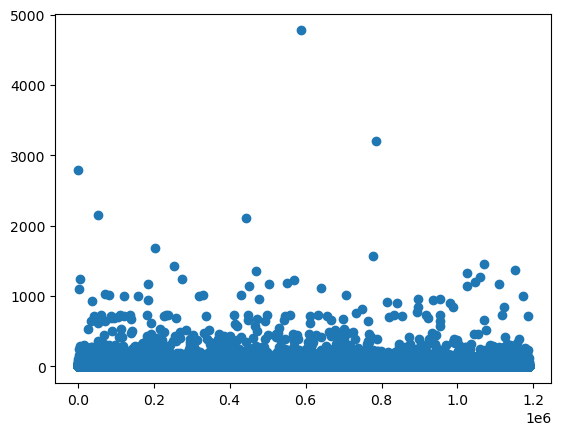

In [59]:
import matplotlib.pyplot as plt
words = df_ru["caption_reference_description"].apply(lambda x : str(x).count(" "))
plt.scatter(words.index, words)

In [60]:
df_ru.loc[df_ru["caption_reference_description"].str.count(" ") > 20, :].shape

(24955, 6)

In [61]:
df_ru.shape

(1187452, 6)

In [62]:
df_ru = df_ru.loc[df_ru["caption_reference_description"].str.count(" ") <= 20, :]

In [63]:
df_ru = df_ru.reindex(range(df_ru.shape[0]))

Разделим датасет по mime_type

In [64]:
df_ru["mime_type"].value_counts()

mime_type
image/jpeg       654917
image/png         84917
image/svg+xml     12282
image/gif          3033
image/webp           11
image/x-bmp           2
Name: count, dtype: int64

In [65]:
df_ru_png = df_ru[df_ru.mime_type == "image/png"]
df_ru_svg_xml = df_ru[df_ru.mime_type == "image/svg+xml"]
df_ru = df_ru[df_ru.mime_type == "image/jpeg"]

In [66]:
df_ru = df_ru[["image_url", "caption_reference_description"]]
df_ru_png = df_ru_png[["image_url", "caption_reference_description"]]
df_ru_svg_xml = df_ru_svg_xml[["image_url", "caption_reference_description"]]

In [67]:
df_ru.to_csv("wiki_ru_jpeg.csv")
df_ru_png.to_csv("wiki_ru_png.csv")
df_ru_svg_xml.to_csv("wiki_ru_svg_xml.csv")